<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2022-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

<h2 style="color:#03122E;text-align:center;"> Capitulo 1. Metodos para Ecuaciones Diferenciales Ordinarias<br> </h2>
<hr style="border:3px solid #E3AE00 "> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

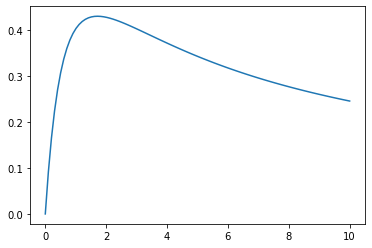

In [60]:
XM = lambda C: 1.0/(2.0*(1+C))*np.log(1+2*C*(1+C))
c=np.linspace(0,10,100)
plt.plot(c, XM(c))
plt.show()

# Metodo de Euler explicito

In [43]:
def Euler_explicito(f, y0, N, XM, x0=0):
    h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0
    for n in range(1,N+1):
        yn += h*f(xn,yn)
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y, x

## Ejemplo:
\begin{equation}
y' = 2x,\quad y(0) = 0 
\end{equation}

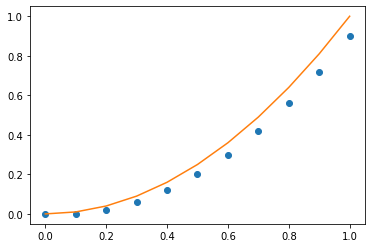

In [44]:
f1 = lambda x,y: 2*x + 0*y
y0 = 0

y10, x10 = Euler_explicito(f1, y0, 10, 1, 0)
yexact = lambda x: x**2
plt.plot(x10,y10,'o')
plt.plot(x10,yexact(np.asarray(x10)))
plt.show()

## Ejemplo:
\begin{equation}
y' = \tan^{-1}(y),\quad y(0) = y_0 
\end{equation}

[1, 1.3926990816987241, 1.8667349680217304, 2.4062361585724923, 2.994698997351703, 3.6189564112625305, 4.2695568007328895, 4.939920368696133, 5.625451871766871, 6.322887143821785, 7.029857115694665]


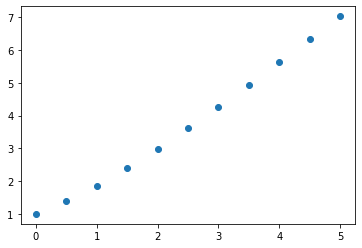

In [57]:
f1 = lambda x, y: np.arctan(y)
y0 = 1

y10, x10 = Euler_explicito(f1, y0, 10, 5, 0)
#yexact = lambda x: x**2
print(y10)
plt.plot(x10,y10,'o')
#plt.plot(x10,yexact(np.asarray(x10)))
plt.show()

## Ejemplo 2:
\begin{equation}
y' = y^{2} - \frac{x^{4} - 6x^{3} + 12x^{2} - 14x + 9}{(1+x)^{2}},\quad y(0) = 2 
\end{equation}

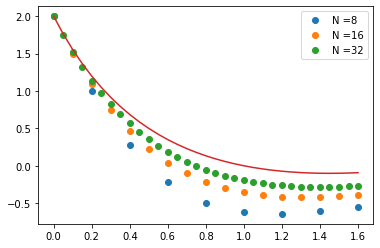

In [53]:
f2 = lambda x, y: y**2-(x**4-6*x**3 + 12*x**2 - 14*x + 9)/(1+x)**2
y0 = 2
yexact = lambda x: (1-x)*(2-x)/(1+x)
y8, x8 = Euler_explicito(f2, y0, N=8, XM = 1.6, x0 =0)
y16, x16 = Euler_explicito(f2, y0, N=16, XM = 1.6, x0 =0)
y32, x32 = Euler_explicito(f2, y0, N=32, XM = 1.6, x0 =0)

plt.plot(x8,y8, 'o', label='N =8')
plt.plot(x16,y16, 'o', label='N =16')
plt.plot(x32,y32, 'o', label='N =32')
plt.plot(x32, yexact(np.asarray(x32)))
plt.legend()
plt.show()